In [29]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import models,layers,Sequential
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.manifold import TSNE

In [31]:
(x_train,_),(x_test,y_test) = fashion_mnist.load_data()

In [21]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

x_train = np.expand_dims(x_train,axis=-1)
x_test = np.expand_dims(x_test,axis=-1)

In [22]:
encoder = Sequential([
    layers.Flatten(input_shape=[28,28]),
    layers.Dense(100,activation="selu",kernel_initializer='lecun_normal'),
    layers.Dense(30,activation="selu",kernel_initializer='lecun_normal'),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
decoder = Sequential([
    layers.Dense(100,activation='selu',kernel_initializer='lecun_normal'),
    layers.Dense(28 * 28,activation='sigmoid',kernel_initializer='lecun_normal'),
    layers.Reshape([28,28])
])

In [24]:
stacked_ae = Sequential([encoder,decoder])
stacked_ae.compile(
    loss='binary_crossentropy',
    optimizer = keras.optimizers.SGD(learning_rate=1.5)
)

In [25]:
history = stacked_ae.fit(x_train,x_train,epochs=8,validation_data=(x_test,x_test))

Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.4000 - val_loss: 0.3179
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 0.3116 - val_loss: 0.3148
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.3020 - val_loss: 0.2984
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.2958 - val_loss: 0.2949
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.2926 - val_loss: 0.2992
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.2909 - val_loss: 0.2897
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.2884 - val_loss: 0.2889
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.2875 - val_loss: 0.2872


In [26]:
def plot_img(img):
  plt.imshow(img,cmap='binary')
  plt.axis('off')

In [27]:
def show_reconstruction(model,n_images=5):
   reconstruction = model.predict(x_test[:n_images])
   fig = plt.figure(figsize=(n_images * 1.5,3))
   for image_index in range(n_images):
       plt.subplot(2,n_images,1 + image_index)
       plot_img(x_test[image_index])
       plt.subplot(2,n_images,1  + n_images + image_index)
       plot_img(reconstruction[image_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


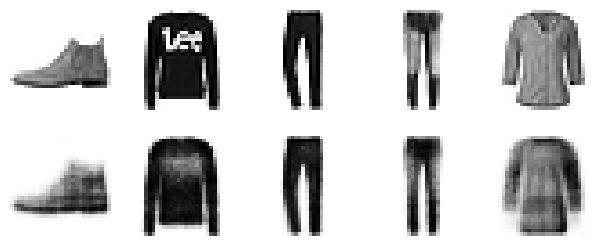

In [28]:
show_reconstruction(stacked_ae)

In [30]:
x_test_compressed  = encoder.predict(x_test)
tsne = TSNE()
x_test_2D = tsne.fit_transform(x_test_compressed)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


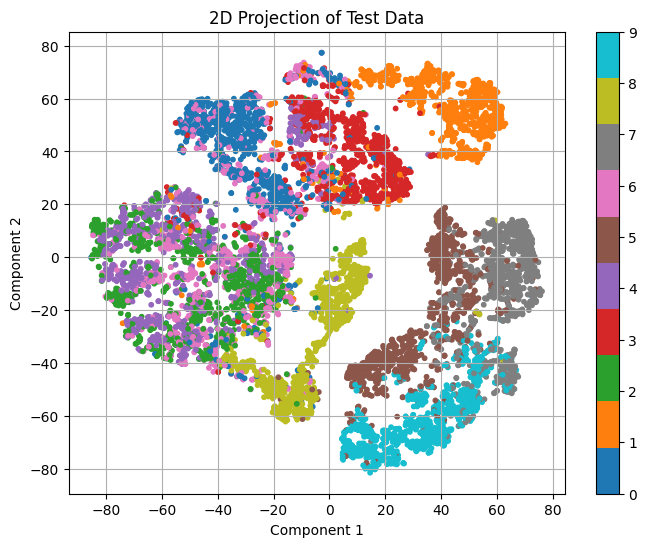

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(x_test_2D[:, 0], x_test_2D[:, 1], c=y_test, s=10, cmap="tab10")
plt.colorbar()
plt.title("2D Projection of Test Data")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()

In [37]:
def show_images_by_cluster(images, cluster_labels, cluster_id, n=10):
    indices = np.where(cluster_labels == cluster_id)[0]
    sample_indices = np.random.choice(indices, size=min(n, len(indices)), replace=False)

    plt.figure(figsize=(10, 2))
    for i, idx in enumerate(sample_indices):
        plt.subplot(1, n, i+1)
        img = images[idx]
        if img.shape[-1] == 1:
            plt.imshow(img.squeeze(), cmap='gray')
        else:
            plt.imshow(img.astype("uint8"))
        plt.axis('off')
    plt.suptitle(f"Cluster {cluster_id}")
    plt.show()

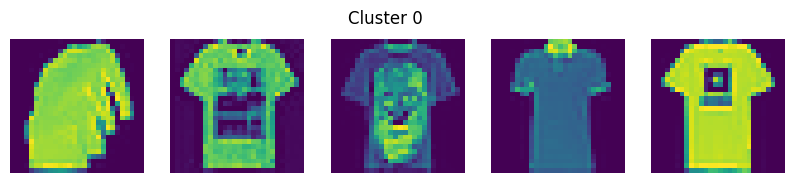

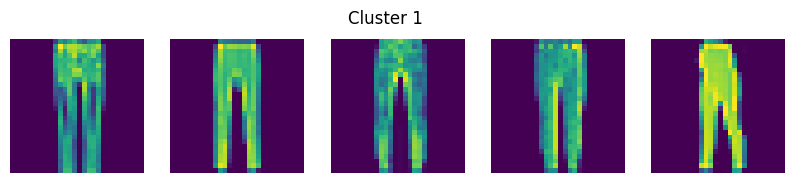

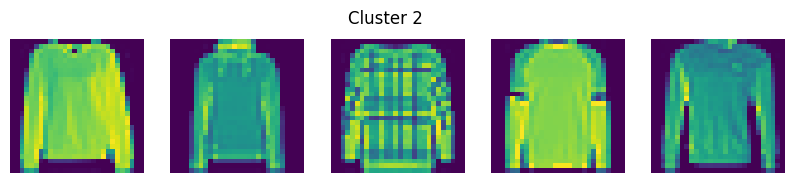

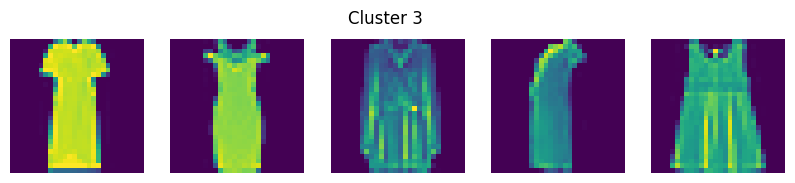

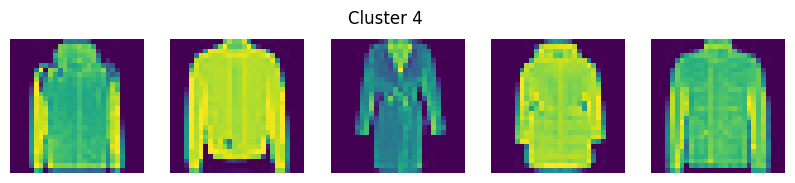

In [38]:
for cluster_id in range(5):
    show_images_by_cluster(x_test, y_test, cluster_id, n=5)